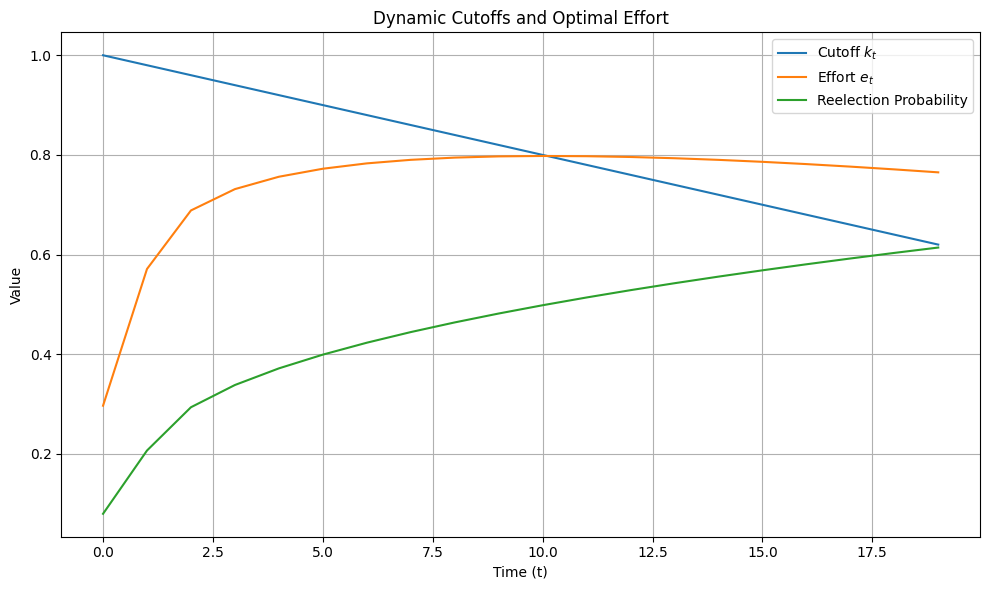

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize_scalar

# --- Parameters ---
T = 20                    # number of periods
k0 = 1.0                  # initial cutoff
alpha = 0.02              # rate of cutoff decline
sigma = 0.5               # noise std dev
R = 1                     # reward from reelection

# --- Storage ---
cutoffs = []
efforts = []
reelection_probs = []

# --- Effort payoff function ---
def incumbent_payoff(e, k_t):
    """Returns negative utility (for minimization)"""
    prob = 1 - norm.cdf((k_t - e) / sigma)  # reelection probability
    cost = 0.5 * e**2                       # effort cost
    return -(R * prob - cost)              # negative for minimizer

# --- Simulation loop ---
for t in range(T):
    k_t = k0 - alpha * t
    cutoffs.append(k_t)

    # Find optimal effort
    result = minimize_scalar(incumbent_payoff, args=(k_t,), bounds=(0, 5), method='bounded')
    e_star = result.x
    efforts.append(e_star)

    # Compute reelection probability
    prob = 1 - norm.cdf((k_t - e_star) / sigma)
    reelection_probs.append(prob)

# --- Plotting ---
plt.figure(figsize=(10, 6))

plt.plot(cutoffs, label="Cutoff $k_t$")
plt.plot(efforts, label="Effort $e_t$")
plt.plot(reelection_probs, label="Reelection Probability")

plt.xlabel("Time (t)")
plt.ylabel("Value")
plt.title("Dynamic Cutoffs and Optimal Effort")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()